<a href="https://colab.research.google.com/github/vifirsanova/empi/blob/main/xai/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

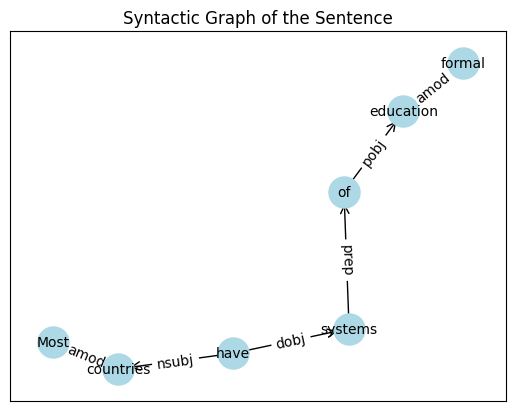

In [ ]:
import torch
from transformers import BertModel, BertTokenizer
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Load spaCy for dependency parsing
nlp = spacy.load("en_core_web_sm")

# Step 1: Tokenize the sentence
sentence = "Most countries have systems of formal education"
inputs = tokenizer(sentence, return_tensors="pt")

# Step 2: Get BERT embeddings
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.squeeze(0)  # Shape: [seq_len, hidden_size]

# Step 3: Dependency parsing using spaCy
doc = nlp(sentence)

# Create a graph with tokens as nodes
G = nx.DiGraph()

# Add nodes with token information
for token in doc:
    G.add_node(token.i, label=token.text, embedding=embeddings[token.i].numpy())

# Add edges based on syntactic dependencies
for token in doc:
    if token.dep_ != "ROOT":  # Ignore the root token (no parent)
        G.add_edge(token.head.i, token.i, label=token.dep_)

# Step 4: Visualize the graph
# Extract positions for visualization
pos = nx.spring_layout(G)

# Draw nodes with labels (tokens)
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

# Draw edges with labels (dependencies)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Syntactic Graph of the Sentence")
plt.show()


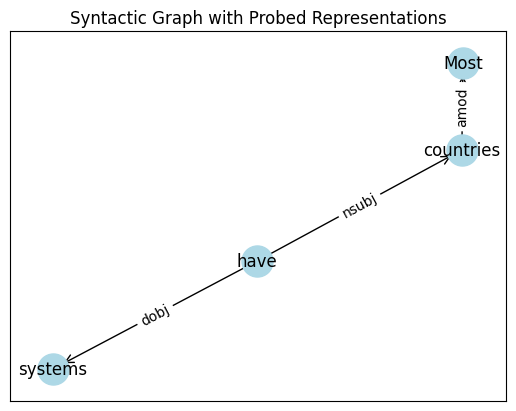

In [ ]:
import torch
from transformers import BertModel, BertTokenizer
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Load spaCy for dependency parsing
nlp = spacy.load("en_core_web_sm")

# Step 1: Tokenize the sentence
sentence = "Most countries have systems"
inputs = tokenizer(sentence, return_tensors="pt")

# Step 2: Get BERT embeddings
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.squeeze(0)  # Shape: [seq_len, hidden_size]

# Step 3: Dependency parsing using spaCy
doc = nlp(sentence)

# Step 4: Initialize the linear probe (for simplicity, we'll assume identity matrix here)
# In real structural probing, this probe is trained to map BERT embeddings to parse trees
probe_matrix = torch.eye(embeddings.size(1))  # Identity matrix as a placeholder

# Apply the probe to embeddings (in practice, this would be learned)
probed_representations = torch.matmul(embeddings, probe_matrix)

# Step 5: Build the syntactic graph based on probed representations and dependency parsing
G = nx.DiGraph()

# Add nodes with token information
for token in doc:
    G.add_node(token.i, label=token.text, embedding=probed_representations[token.i].numpy())

# Add edges based on syntactic dependencies
for token in doc:
    if token.dep_ != "ROOT":  # Ignore the root token (no parent)
        G.add_edge(token.head.i, token.i, label=token.dep_)

# Step 6: Visualize the graph
# Extract positions for visualization
pos = nx.spring_layout(G)

# Draw nodes with labels (tokens)
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)

# Draw edges with labels (dependencies)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Syntactic Graph with Probed Representations")
plt.show()
